In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.warnings.filterwarnings("ignore")
from time import time
from numba import njit,prange

In [2]:
def mandelbroth(c=complex(1,1),n=10):
    z = 0
    for i in range(n):
        z=z**(2**0.5)+c
    return z

In [3]:
complex(1,1)

(1+1j)

In [4]:
mandelbroth = np.vectorize(mandelbroth)

In [5]:
def check_stabil_old(z):
    try:
        r = (z.imag**2+z.real**2)**0.5
    except OverflowError:
        return False
    if r>2:
        return False
    else:
        return True
    
def check_stabil(z):
    try:
        r = abs(z)
    except OverflowError:
        return False
    if r>2:
        return False
    else:
        return True
    
def np_check_stabil(z):
    try:
        r = np.abs(z)
    except OverflowError:
        return False
    if r>2:
        return False
    else:
        return True
    

check_stabil = np.vectorize(check_stabil)
check_stabil_old = np.vectorize(check_stabil_old)
np_check_stabil = np.vectorize(np_check_stabil)

In [6]:
def make_space(step,start=-2,stop=2):
    real = np.vstack([np.linspace(start,stop,step,dtype=complex)]*step)
    imag = np.vstack([np.linspace(start*1j,stop*1j,step,dtype=complex)]*step)
    return real+imag.T

In [7]:
C = make_space(1000)

In [28]:
times = {"old":[],"new":[],"numpy":[]}

benchs = [10,100,200,300,500,750]

for N in benchs:
    
    C = make_space(N)
    
    start = time()

    res = check_stabil_old(mandelbroth(C))
    

    times["old"].append(time()-start)
    
    start = time()

    res = check_stabil(mandelbroth(C))

    times["new"].append(time()-start)
    
    start = time()

    res = np_check_stabil(mandelbroth(C))

    times["numpy"].append(time()-start)
    





In [29]:
C = make_space(1000)

In [30]:
res = np_check_stabil(mandelbroth(C))

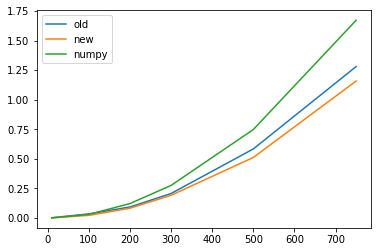

In [31]:
fig,ax = plt.subplots()

for algo in times:
    ax.plot(benchs,times[algo],label=algo)
    
plt.legend();

In [32]:
start = time()

res = check_stabil_old(mandelbroth(C))

print(time()-start)

2.2604360580444336


In [33]:
fig,axes = plt.subplots(1,2,figsize=(12,8),dpi=1000)
axes[0].scatter(C[res].real,C[res].imag)
axes[1].imshow(res)
plt.savefig("mandelbroth.png")

# Numba

In [34]:
@njit
def mandelbroth(c=complex(1,1),n=10):
    z = 0
    for i in range(n):
        z=z**2+c
    return z

In [35]:
@njit
def check_stabil(z):
    try:
        r = abs(z)
    except OverflowError:
        return False
    if r>2:
        return False
    else:
        return True

In [36]:
def make_space(step,start=-2,stop=2):
    real = np.vstack([np.linspace(start,stop,step,dtype=complex)]*step)
    imag = np.vstack([np.linspace(start*1j,stop*1j,step,dtype=complex)]*step)
    return real+imag.T

In [37]:
C = make_space(100)

In [38]:
mandelbroth(C[0][0])

(-2.179962618679341e+208+5.767460321370287e+208j)

In [39]:
def make_space(step=5,start=-2,stop=2):

    arr = np.linspace(start,stop,step**2).reshape(step,step)
    arr = (arr.T-arr[:,0])
    
    return arr+(arr*1j)
    

In [40]:
make_space(10000)

array([[0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j, ...,
        0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [4.00000004e-08+4.00000004e-08j, 4.00000002e-08+4.00000002e-08j,
        4.00000004e-08+4.00000004e-08j, ...,
        4.00000002e-08+4.00000002e-08j, 4.00000006e-08+4.00000006e-08j,
        4.00000006e-08+4.00000006e-08j],
       [8.00000008e-08+8.00000008e-08j, 8.00000006e-08+8.00000006e-08j,
        8.00000008e-08+8.00000008e-08j, ...,
        8.00000008e-08+8.00000008e-08j, 8.00000008e-08+8.00000008e-08j,
        8.00000008e-08+8.00000008e-08j],
       ...,
       [3.99880004e-04+3.99880004e-04j, 3.99880004e-04+3.99880004e-04j,
        3.99880004e-04+3.99880004e-04j, ...,
        3.99880004e-04+3.99880004e-04j, 3.99880004e-04+3.99880004e-04j,
        3.99880004e-04+3.99880004e-04j],
       [3.99920004e-04+3.99920004e-04j, 3.99920004e-04+3.99920004e-0